In [1]:
import random
import string
import abc
import sys
from datetime import datetime
from models import *
from functions import *


ModuleNotFoundError: No module named &#39;werkzeug&#39;

In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

&#39;ccbnebhcrz&#39;

In [3]:
import pandas as pd

In [4]:
Client.change_client(id = '4-846-342', client_name= 'Jens Hoffmann')

   index  Unnamed: 0         id      client_name
0      1           1  4-846-342  Susana Castillo


In [5]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [6]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [7]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))
  product_ids.append(id)
  return id   


In [9]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [10]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [11]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [12]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [13]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [14]:
%%time
ids = []
product_ids = []
clientes = generate_clients(1000)
products = []

# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    month = random.choice(range(1,13))
    # SI EL MES ES FEBRERO... ENTRE 1 Y 28
    if month == 2: day = random.choice(range(1,29))
    # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
    elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
    # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
    else: day = random.choice(range(1,30))

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)),
          From = datetime(random.choice(range(2018,2020+1)),month ,day))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

&lt;class &#39;property&#39;&gt;
Productos generados: 2540
Clientes generados: 1000
Wall time: 662 ms


In [15]:
products[0].owner

&#39;7-155-247&#39;

## Generar transacciones

In [16]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []



for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 68605
Media de transacción por cliente: 27.00984251968504
Wall time: 9.21 s


## Generar tablas

In [17]:
df_loans =[]
df_deposits = []
df_CreditCards = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)
  if type(p) is CreditCard:
    df_CreditCards.append(p)



In [18]:
df_CreditCards = pd.DataFrame.from_records([j.to_dict() for j in df_CreditCards])
df_CreditCards.head(3)

,id,interest_rate,balance,owner,type
0,8274669333946540,2,0.0,6-633-659,CreditCard
1,9124651635793636,2,0.0,10-476-998,CreditCard
2,6656463853025586,2,0.0,6-232-581,CreditCard


In [19]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,7-155-247,cvvmivress ctokcxidmkqwhtw
1,3-282-337,bikiacktmc znjrnjuqkzmnlrp
2,6-633-659,cwxwsroamp zqievglfdhdprab


In [20]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base,From
0,7806058,10,0.0,7-155-247,Loan,45,360,2020-01-12
1,7235300,6,0.0,5-413-439,Loan,28,360,2020-07-12
2,4113726,10,0.0,8-451-534,Loan,1,365,2020-06-04


In [21]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,6639794,1,0.0,7-155-247,SavingAccount
1,2688901,2,0.0,7-155-247,SavingAccount
2,7658062,2,0.0,7-155-247,SavingAccount


In [22]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions.to_csv("db/transactions.csv")
df_transactions


,id,nature,accounting_date,amount,product,mvt
0,7988559,Cr,2016-12-04,6.178857e+08,6639794,6.178857e+08
1,3397286,Cr,2016-05-16,6.588440e+08,6639794,6.588440e+08
2,2883417,Dr,2010-04-22,9.514512e+08,6639794,-9.514512e+08
3,9079893,Cr,2011-04-03,2.980879e+08,6639794,2.980879e+08
4,1900311,Cr,2019-06-29,1.105539e+08,6639794,1.105539e+08
...,...,...,...,...,...,...
68600,7500952,Dr,2017-02-22,1.961755e+08,3020372,-1.961755e+08
68601,9274266,Cr,2016-01-15,6.121887e+07,3020372,6.121887e+07
68602,138189,Cr,2012-01-01,4.122421e+08,3020372,4.122421e+08
68603,5503022,Cr,2013-05-20,7.822434e+08,3020372,7.822434e+08


In [23]:

Transfer.Execute(to=9157504, From=9068226181363497, amount= 85)



Executing Bank Transfer
Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type, length, base, From]
Index: [] Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type]
Index: []
ERROR


IndexError: single positional indexer is out-of-bounds

In [23]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

,id,interest_rate,balance,owner,type
0,8092708,1,2.374028e+10,3-600-49,FixedTermDeposit
1,7289344,1,4.971254e+09,3-600-49,SavingAccount
2,3491777,2,3.685589e+10,3-600-49,FixedTermDeposit
3,1883376,2,4.670325e+08,4-846-342,FixedTermDeposit
4,8323621,1,2.152342e+10,4-846-342,SavingAccount
...,...,...,...,...,...
1251,8435732,1,2.237355e+10,8-322-539,FixedTermDeposit
1252,9436980,1,1.814012e+10,7-802-815,SavingAccount
1253,2460136,1,3.097547e+10,7-409-761,FixedTermDeposit
1254,2927995,1,1.696730e+10,7-409-761,FixedTermDeposit


## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [24]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [25]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 8092708
Found 18 transactions from 2010-05-28 00:00:00 to 2020-03-05 00:00:00
         id nature accounting_date        amount  product           mvt
0   1282386     Cr      2010-05-28  3.772852e+08  8092708  3.772852e+08
1   1409096     Cr      2010-06-29  5.246472e+08  8092708  5.246472e+08
2   4524272     Cr      2010-07-09  6.739706e+08  8092708  6.739706e+08
3   1047946     Cr      2012-07-09  3.845134e+08  8092708  3.845134e+08
4   9939982     Cr      2014-01-22  4.743733e+08  8092708  4.743733e+08
5   9651771     Dr      2014-03-31  2.304600e+08  8092708 -2.304600e+08
6   2175381     Cr      2014-08-07  4.895815e+08  8092708  4.895815e+08
7   5611603     Cr      2015-06-17  8.658096e+08  8092708  8.658096e+08
8   6445362     Cr      2015-12-18  3.741925e+08  8092708  3.741925e+08
9   5494847     Cr      2016-01-23  7.634298e+08  8092708  7.634298e+08
10  2321748     Cr      2016-10-03  6.864491e+08  8092708  6.864491e+08
11  5266469     Cr  

#### Mostrar un gráfico con el movimiento de su producto

In [26]:
import matplotlib.pyplot as plt

In [27]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         1282386140909645242721047946993998296517712175...
nature                  CrCrCrCrCrDrCrCrCrCrCrCrDrCrCrCrCrCr
amount                                           9.62487e+09
product    8092708809270880927088092708809270880927088092...
mvt                                             -7.88424e+09
dtype: object

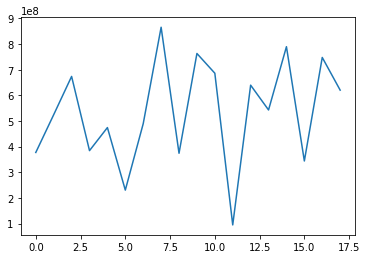

In [28]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [29]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 8092708
Found 18 transactions from 2010-05-28 00:00:00 to 2020-03-05 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,1282386,Cr,2010-05-28,3.772852e+08,8092708,3.772852e+08
1,1409096,Cr,2010-06-29,5.246472e+08,8092708,5.246472e+08
2,4524272,Cr,2010-07-09,6.739706e+08,8092708,6.739706e+08
3,1047946,Cr,2012-07-09,3.845134e+08,8092708,3.845134e+08
4,9939982,Cr,2014-01-22,4.743733e+08,8092708,4.743733e+08
5,9651771,Dr,2014-03-31,2.304600e+08,8092708,-2.304600e+08
6,2175381,Cr,2014-08-07,4.895815e+08,8092708,4.895815e+08
7,5611603,Cr,2015-06-17,8.658096e+08,8092708,8.658096e+08
8,6445362,Cr,2015-12-18,3.741925e+08,8092708,3.741925e+08
9,5494847,Cr,2016-01-23,7.634298e+08,8092708,7.634298e+08


### Generar tablas

In [30]:
df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")
df_CreditCards.to_csv("db/CreditCards.csv")

## Pruebas

In [31]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")

dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']
print(dep2)
client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))


Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type]
Index: []


In [32]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [33]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

d:\AQUI\banking-system-emulator\flask-app\app


In [34]:
Client.getClientProducts(client='8-481-903')

[]

In [35]:
#Product.getProductBalance(id=7721659)

UnboundLocalError: local variable &#39;balance&#39; referenced before assignment

In [ ]:
'{:.2f}'.format(14669322166.459997)

In [ ]:
l = Loan(length = 12,base=365,balance=500,id='12123',interest_rate=3,owner="")
l.generate_amortization_table()

In [ ]:
l.to_dict()